# Augmentation Strategies for Enhanced Generalization in Neural Networks Training

## Introduction
This notebook extends the content of the [Template notebook](./Template.ipynb) by providing an in-depth exploration of augmentation layers. It aims to help users understand and visualize the wide range of tools available in Keras and Keras_cv, as well as how to effectively combine them into pipelines to identify the most suitable augmentation strategies for their use case.

The following image demonstrates our sample image (*figure 11* from `data/training_set_clean.npz`) alongside its variations generated using the most common augmentations provided by Keras_cv.

**Note**: all auxiliary functions applied in this notebook are defined in [AugmentationsUtils.py](./py_modules/AugmentationsUtils.py).


![cells_aug_A](./img/cells_aug_A.png)

## Setup and Configuration
Preparing the workspace by mounting the drive, installing required packages, importing libraries, and loading the dataset for processing.

In [2]:
COLAB = True

if COLAB:
    from google.colab import drive
    !pip install keras_cv -qq
    drive.mount('/gdrive')
    %cd /gdrive/My Drive/ANN/AUGMENTATIONS



import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras_cv as kcv
from tensorflow.keras.applications.convnext import preprocess_input
from py_modules.augmentations_utils import *
data = np.load('data/training_set_clean.npz')

SEED = 2024

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/ANN/AUGMENTATIONS


## Augmentation Layers and Parameterization
This section introduces augmentation layers implemented with Keras_cv, aimed at enhancing dataset variability and improving neural network generalization. The parameters were carefully chosen to balance diversity and maintain the original images' semantic integrity, ensuring realistic variations.

Augmentations are categorized into:
- **Single-image augmentations**: Applied to a single image.
- **Inter-images augmentations**: Combine features from multiple images.





In [3]:
single_image_augmentations = [
    "RandAugment",
    "RandomSaturation",
    "AutoContrast",
    "RandomSharpness",
    "ChannelShuffle",
    "Solarization",
    "RandomHue",
    "RandomColorDegeneration",
    "AugMix",
    "GridMask",
    "RandomCutout",
    "RandomShear",
    "JitteredResize",
]

inter_images_augmentations = [
    "CutMix",
    "FourierMix",
    "MixUp"
]


Augmentations are defined as a dictionary for easy configuration and integration into the pipeline, with brief descriptions provided to outline their purpose and parameter choices.


In [4]:
# Augmentation layers

augmentations = {
    "RandAugment": kcv.layers.RandAugment(value_range=(0, 255), augmentations_per_image=4, magnitude=0.6, magnitude_stddev=0.2, rate=0.8),  # Applies a randomized selection of augmentations to the image

    "RandomSaturation": kcv.layers.RandomSaturation(factor=(0.0, 1.0), seed=SEED),  # Randomly adjusts the saturation of the image

    "AutoContrast": kcv.layers.AutoContrast(value_range=(0, 255)),  # Enhances contrast automatically based on pixel distribution

    "RandomSharpness": kcv.layers.RandomSharpness(factor=1.0, value_range=(0, 255), seed=SEED),  # Adjusts sharpness randomly to simulate diverse conditions

    "ChannelShuffle": kcv.layers.ChannelShuffle(groups=3, seed=SEED),  # Randomly rearranges image channels to test color dependencies

    "Solarization": kcv.layers.Solarization(value_range=(0, 255), addition_factor=50, threshold_factor=0.5, seed=SEED),  # Inverts pixel values above a specified threshold

    "RandomHue": kcv.layers.RandomHue(factor=0.7, value_range=(0, 255), seed=SEED),  # Randomly adjusts the hue of the image

    "RandomColorDegeneration": kcv.layers.RandomColorDegeneration(factor=0.7, seed=SEED),  # Converts color images to grayscale with a random factor

    "AugMix": kcv.layers.AugMix(value_range=(0, 255), severity=(0.6, 0.9), num_chains=5, chain_depth=[3, 6], alpha=0.5, seed=SEED),  # Combines multiple augmentations to generate diverse transformations

    "GridMask": kcv.layers.GridMask(ratio_factor=(0, 0.5), rotation_factor=0.2, fill_mode="constant", fill_value=0.0, seed=SEED),  # Applies a grid pattern mask with random rotation and spacing

    "RandomCutout": kcv.layers.RandomCutout(height_factor=0.4, width_factor=0.4, fill_mode="constant", fill_value=0.0, seed=SEED),  # Masks out random rectangular regions of the image

    "RandomShear": kcv.layers.RandomShear(x_factor=0.3, y_factor=0.6, interpolation="bilinear", fill_mode="reflect", fill_value=0.0, seed=SEED),  # Applies a random shearing transformation to the image

    "JitteredResize": kcv.layers.JitteredResize(target_size=(96, 96), scale_factor=(0.8, 1.6), crop_size=None, interpolation="bilinear", seed=SEED),  # Resizes the image with added random jittering

    "CutMix": kcv.layers.CutMix(alpha=1.0, seed=SEED),  # Combines two images by blending rectangular regions

    "FourierMix": kcv.layers.FourierMix(alpha=0.5, decay_power=3, seed=SEED),  # Merges the Fourier transforms of two images

    "MixUp": kcv.layers.MixUp(alpha=0.2, seed=SEED)  # Mixes two images by linearly combining pixel values
}


## Augmentations Preview

The effects of different augmentation combinations are illustrated on a single image or a set of images by performing the following operations:

- **Single Augmentation**: One augmentation is applied at a time to each image, selected from the `single_image_augmentations` list.  
- **Multiple Augmentations**: Multiple augmentations are applied sequentially to the same set of images, selected based on their `image_indices`.  
- **Inter-Images Augmentations**: Augmentations that combine features from one image with another are demonstrated, including the combination of corresponding labels to ensure consistency with the augmented data. These augmentations are extracted from `inter_images_augmentations`.  
- **Augmentation Pipelines**: The defined augmentation pipeline is applied to the same set of images.

## Original Figures
Below, it is possible to visualize the original images from the clear dataset. One cell per each class is currently displayed with its own index.

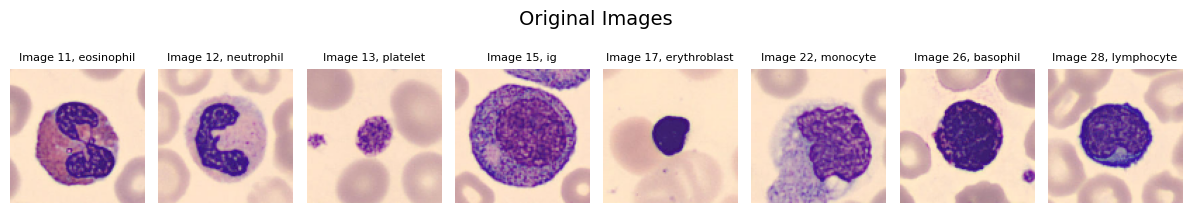

In [11]:
image_indices = [11,12,13,15,17,22,26,28]

plot_original_images(data, image_indices)

## Single Augmentations

This section demonstrates the effects of applying a single augmentation to a set of images, with each figure undergoing one augmentation.

Users can select the images by specifying their indices and choose the augmentations to apply from the previously defined `single_image_augmentations` list.


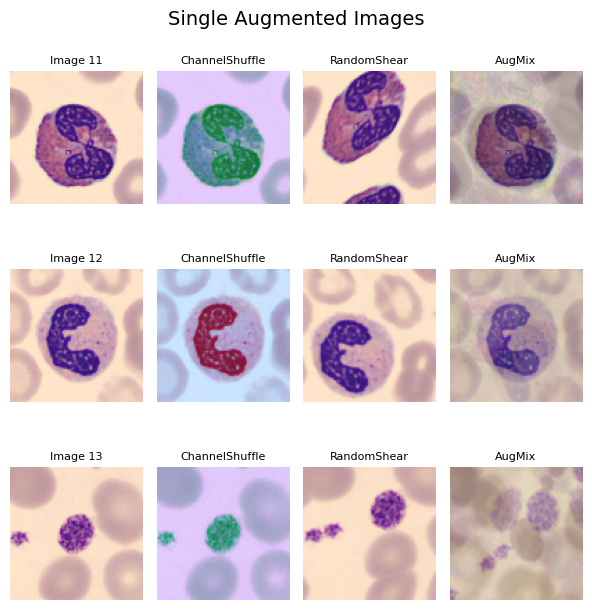

In [12]:
image_indices = [11, 12, 13]
single_augmentations = ["ChannelShuffle", "RandomShear", "AugMix"]

apply_single_augmentations(data, augmentations, image_indices, single_augmentations)

## Inter-Images Augmentations

This section introduces the possibility of combining features from different images to enhance dataset diversity.

To achieve this, labels must be carefully handled and one-hot encoded. Below, you can see the combinations of images along with the fractional results of their labels.

As with the above, the image set to be plotted, along with the subset of `inter_images_augmentations`, can be selected by the user.


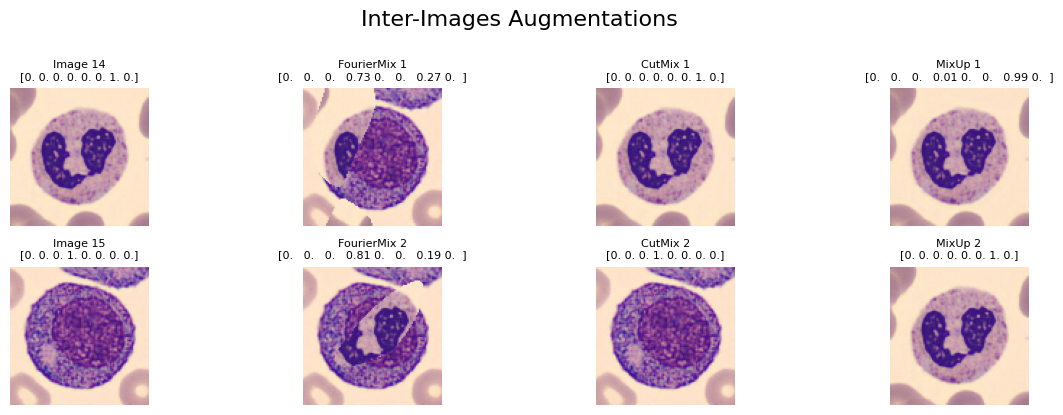

In [13]:
image_indices = [14,15]
inter_augmentations = ["FourierMix", "CutMix", "MixUp"]

apply_inter_augmentations(data, augmentations, image_indices, inter_augmentations)

## Augmentation Pipelines

This section demonstrates the effects of a custom pipeline defined by the user.

It is possible to create and customize one or more augmentation pipelines by:

1. **Adjusting Parameters**:
   - **`augpi`**: Specifies the number of augmentations applied per image.
   - **`RATE_pipeline`**: Defines the probability of applying each augmentation, allowing control over both intensity and frequency.

2. **Selecting Augmentation Layers**:
   Users can choose specific augmentation layers to include in the pipeline. This enables tailored augmentation strategies that align with their dataset characteristics and training objectives.
   
These settings allow for precise fine-tuning of the augmentation process, ensuring that it matches the dataset's unique traits and optimizes training outcomes effectively.


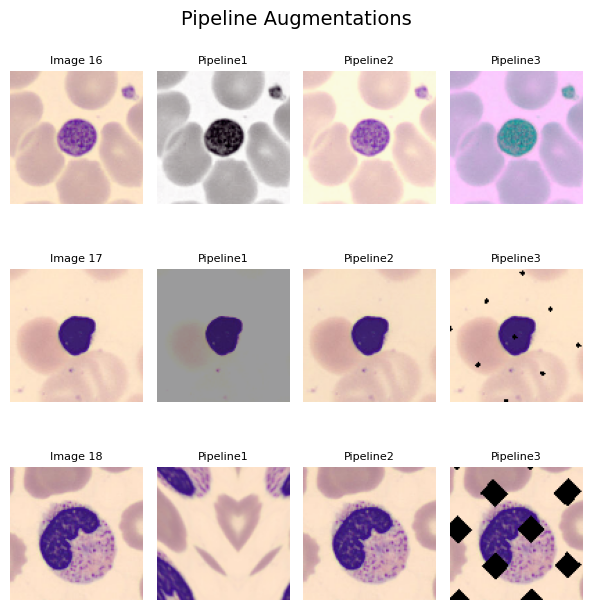

In [14]:
image_indices = [16,17,18]

augpi = 2
RATE_pipeline = 0.75
layers_pipeline1 = ["RandAugment", "RandomCutOut"]
layers_pipeline2 = ["AugMix", "Solarization"]
layers_pipeline3 = ["GridMask", "RandomHue"]

pipelines = [layers_pipeline1, layers_pipeline2, layers_pipeline3]

apply_pipeline_augmentations(data, augmentations, image_indices, pipelines, augpi, RATE_pipeline, SEED)

## Final Remarks
Data augmentations are a cornerstone in the development of robust neural networks. By introducing variability and enhancing the diversity of training data, augmentations significantly reduce overfitting and improve the model's ability to generalize to new, unseen data. This high-impact technique ensures that neural networks perform reliably across a wide range of real-world scenarios.

The methods and augmentation pipelines employed in the final version of this project are thoroughly presented in the main notebook.


This current notebook is designed to provide an immersive exploration of the vast possibilities offered by data augmentations. It empowers users to customize and experiment with different augmentation techniques, enabling them to identify and implement the best options tailored to their specific datasets and training objectives. By offering a hands-on approach, this notebook ensures that users can fine-tune the augmentation process to achieve the most effective results.
